# 911 Calls Debrief

#### 911 is the universal emergency number in North America. Dialing 911 will connect you to the local emergency services (police, fire, ambulance, mountain rescue etc.). It is important to understand when to dial 911, and how the system works. 

#### Non-emergency calls to the 911 system can cause delays in handling other very serious emergencies that require immediate attention. Please be sure not to abuse this service. Making a hoax call is a crime in many areas.

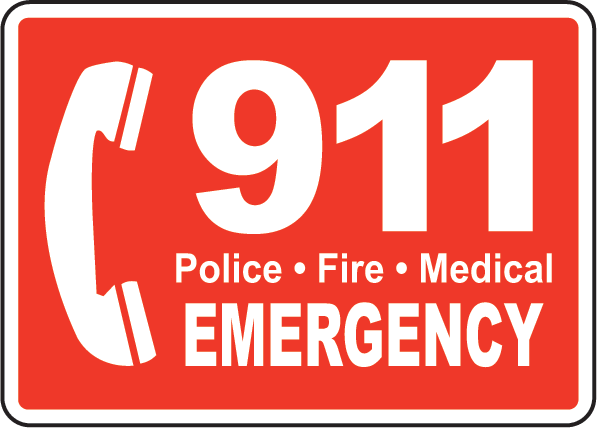

## Here we are going to analyze 911 Calls for Pennsylvania, US State

### Let us begin

In [ ]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load in 

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the "../input/" directory.
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# Any results you write to the current directory are saved as output.

#### Importing the mandatory libraries

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
from pandas_profiling import ProfileReport

In [ ]:
# Loading the Dataset
df = pd.read_csv("/kaggle/input/montcoalert/911.csv")

In [ ]:
# Viewing the head of dataset. How the data looks.
df.head()

 ### EDA through pandas-profiling
Instead of just giving you a single output, pandas-profiling enables its user to quickly generate a very broadly structured HTML file containing most of what you might need to know before diving into a more specific and individual data exploration . We will use the insights we get from the output of Pandas Report

#### Please note: It may take some while to run the Pandas Report. Please be patient !

In [ ]:
# pfr = ProfileReport(df, title="911_EDA")
# pfr

#### Perform Regular EDA for the dataset

In [ ]:
df.info()

In [ ]:
df.size

In [ ]:
df.shape

In [ ]:
df.describe()

In [ ]:
# Null Value check
df.isnull().sum()

### We get a handful of insights from this one line pandas profile report code. 
 
Mentioning few handy insights from EDA :
1. There are 5 categorical variables, 3 Numerical variables and 1 Boolean
2. Column 'e' is rejected as it has only a constant value '1'
3. timeStamp is considered for applying to pd.todatetime() to get days, hours, week etc
4. lat,lng are highly skewed
5. Data has only 72 duplicate rows which is very less compared to size of the data
6. We have 69 Distinct Townships and 159 datapoints are missing in the Township column
7. We have 171 distinct zipcodes and 52129 atapoints are missing in the zip column
8. We have counts for each column in Missing value tab 'Counts'
 
Let's Proceed with the further analysis on data by visualization using Matplotlib and Seaborn

In [ ]:
#Since e has a constant value , dropping the column
df.drop(['e'],axis=1,inplace=True)

In [ ]:
# Fill NaN values with zero
df.fillna(0 ,inplace=True)
df.isnull().sum()

In [ ]:
df.head()

#### Let's convert dayhours with dddd/mm/yy and create new feature with year
##### Create 6 new columns out of timestamp
1. Year
2. Month
3. Day
4. Day_name
5. Date
6. part_of_day

In [ ]:
from datetime import datetime
import calendar

In [ ]:
#We can convert a string to datetime using strptime() function
df['timeStamp'] = df['timeStamp'].apply(lambda x: datetime.strptime(x, "%Y-%m-%d %H:%M:%S"))

In [ ]:
#Converting to Columns

df['Year'] = df['timeStamp'].apply(lambda t: t.year)
df['Month'] = df['timeStamp'].apply(lambda t: calendar.month_name[t.month])
df['Day'] = df['timeStamp'].apply(lambda t: t.day)
df['day name'] = df['timeStamp'].apply(lambda t: calendar.day_name[t.dayofweek])
df['Date'] = df['timeStamp'].apply(lambda t: t.date())

In [ ]:
# Since we have different annotations for different time of a day, 
# So to get each part of day from Hours we define a function
def partofday(hour):
    return (
        "morning" if 5 <= hour <= 11
        else
        "afternoon" if 12 <= hour <= 17
        else
        "evening" if 18 <= hour <= 22
        else
        "night"
    )

In [ ]:
# Getting the part of day column
df["part_of_day"] = df['timeStamp'].apply(lambda t: partofday(t.hour))

##### We can see that title column has reasons for 911 calls mostly headed as three different type (EMS,Fire,Traffic)
 
So we will be splitting the title column into Main Reason Column and its subcategories and then drop the title column as it will not be needed further

In [ ]:
df['Reason'] = df['title'].apply(lambda title: title.split(':')[0])
df['Reason_subtype'] = df['title'].apply(lambda title: title.split(':')[1])

In [ ]:
#Since title column is not needed anymore,hence dropping the column
df.drop(['title'],axis=1,inplace=True)

#view the data head now after subsequent changes made above
df.head()

The Above dataframe looks more precise and handy to carry out further visualizaion for better Insights.
### Let's begin

In [ ]:
# Visualize Which part of day mostly the calls are made
sns.countplot(x='part_of_day',data=df)

In [ ]:
print (df['part_of_day'].value_counts(normalize=True) * 100)
_, ax = plt.subplots()
ax.set_xlabel("Percentage")
ax.set_ylabel("part_of_day")
sns.set(rc={'figure.figsize': (9,8)})
(df['part_of_day'].value_counts(normalize=True) * 100).plot.barh()

We can see that most of the calls (i.e Around 67 % of calls)
are made during Morning and afternoon time between 5 am to 5 pm

In [ ]:
sns.countplot(x='part_of_day',data=df, hue='Reason')

From Above graph we can notice that most of the calls are Emergency calss and Traffic calls Apart from EMS calls , Traffic calls are also higher subsequently during Morning and Afternoon.


In [ ]:
df['Month'].value_counts().plot(kind='bar',figsize=(12,12))

In [ ]:
plt.figure(figsize=(15,8))
sns.countplot(data=df, x='Month', order=df.Month.value_counts().index, hue='Reason')

In [ ]:
df['Year'].value_counts().plot(kind='bar',figsize=(10,10))

From the Above two graphs we came to know that we have less data for year 2015 and more data for year 2016,2017
Also in moth of January, October and March there is a slightly more no of calls compared to other months and as expected the EMS and Traffic calls are the most in this time period

In [ ]:
# View the locations in map using Folium map
import folium
from folium import plugins
from io import StringIO
import matplotlib.gridspec as gridspec

#Take any random Town lat and long,for Example 3rd Town from df.head
location = folium.Map([df['lat'][3],df['lng'][3]], zoom_start=15,tiles='OpenStreetMap') 
 

location

In [ ]:
# We shall find out the maximum calls made for any reason (Top 15)

Calls_made = df['Reason_subtype'].value_counts()[:15]
plt.figure(figsize=(12, 8))
x = list(Calls_made.index)
y = list(Calls_made.values)
x.reverse()
y.reverse()

plt.title("Most emergency reasons of calls")
plt.ylabel("Reason")
plt.xlabel("Number of calls")

plt.barh(x, y)

Clearly due to Vehicle Accident most of the 911 calls were made followed by Disabled Vehicle and low were for Head Injuries , general weakness etc
Also We can notice that since most of the calls were of EMS and Traffic, so Vehicle Accident should fall under both Head reason i.e EMS and Traffic

In [ ]:
Calls_per_daytiming = df.groupby(by=['Reason','part_of_day']).count()['Reason_subtype'].unstack().reset_index()
Calls_per_daytiming

In [ ]:
dayHour = df.groupby(by=['day name','part_of_day']).count()['Reason_subtype'].unstack()
dayHour.head()

We can notice that most of the calls are on Thursday and Friday Afternoon which is followed by Monday.

In [ ]:
# Visualize through Heatmap
plt.figure(figsize=(12, 8))
sns.heatmap(dayHour,cmap='mako')

In [ ]:
plt.figure(figsize=(12, 8))
sns.clustermap(dayHour, cmap='vlag')

We notice that for Sunday's we have least calls But as compared to Monday to Thursday nights Friday, Saturday ,Sunday night calls are subsequently higher

In [ ]:
# Filtering the EMS calls and its Reason Types
filtered_EMS_calls = df[(df['Reason']!='Fire') & (df['Reason']!='Traffic')]['Reason_subtype']
filtered_EMS_calls

In [ ]:
# Visualising the top 30 Reason among EMS category
print (filtered_EMS_calls.value_counts(normalize=True) * 100)
_, ax = plt.subplots()
ax.set_xlabel("Percentage")
ax.set_ylabel("Reason Subtypes Under EMS")
sns.set(rc={'figure.figsize': (9,8)})
(filtered_EMS_calls.value_counts(normalize=True) * 100)[:30].plot(kind='barh',figsize=(10,10))

We get to know that Most of the Calls are due to Victim Fall, Respiratory Emergency Cardiac Arrest and Vehicle Accident.

There is drastic fall in no of calls from Fever, dehydration and building fire and so on .


In [ ]:
#Filtering Traffic calls and its sub categories
filtered_traffic = df[(df['Reason']!='EMS') & (df['Reason']!='Fire')]['Reason_subtype']
filtered_traffic

In [ ]:
# Visualising the top reasons among Traffic category
print (filtered_traffic.value_counts(normalize=True) * 100)
_, ax = plt.subplots()
ax.set_xlabel("Percentage")
ax.set_ylabel("Reason Subtypes Under Traffic")
sns.set(rc={'figure.figsize': (9,8)})
(filtered_traffic.value_counts(normalize=True) * 100)[:30].plot(kind='barh',figsize=(10,10))

So from the above graph its clear that Vehicle Accident calls falls under both EMS and Traffic 
and it comprises of 65% under Traffic category .
There is very few calls for reason hazardous Road condition or Vehicle Fire

In [ ]:
plt.figure(figsize=(18,7))
df[df['Reason']=='EMS'].groupby('day name').count()['twp'].plot()
plt.title('EMS')
plt.tight_layout()

In [ ]:
plt.figure(figsize=(18,7))
df[df['Reason']=='EMS'].groupby('part_of_day').count()['twp'].plot()
plt.title('EMS')
plt.tight_layout()

As mentioned above,
Morning and Afternoon time are the highest no of calls made which is clear through the above line plot

In [ ]:
plt.figure(figsize=(18,7))
df[df['Reason']=='EMS'].groupby('Date').count()['twp'].plot()
plt.title('EMS')
plt.tight_layout()

In [ ]:
plt.figure(figsize=(18,7))
df.groupby('Date').count()['twp'].plot()
plt.tight_layout()

In [ ]:

plt.figure(figsize=(18,7))
df[df['Reason']=='EMS'].groupby(by=['Reason','part_of_day']).count()['twp'].plot()
plt.title('EMS')
plt.tight_layout()

In [ ]:
plt.figure(figsize=(18,7))
df[df['Reason']=='EMS'].groupby(by=['Reason_subtype','part_of_day']).count()['twp'].plot()
plt.title('EMS')
plt.tight_layout()

We can see how the data is spreaded from the above line graphs.
In Month of March we can see high peaks in no of calls specially in Year 2018

In [ ]:
dayMonth = df.groupby(by=['day name','Month']).count()['Reason'].unstack()
dayMonth.head()

In [ ]:
#Now create a HeatMap using this new DataFrame.
plt.figure(figsize=(12,6))
sns.heatmap(dayMonth,cmap='PuBuGn',linewidths=2)

From the above heatmap it is clear that Month of March has high no of calls and that too Friday records the most no of calls

In [ ]:
# Finding the Unique Townships in the dataset
df[["twp","Reason"]].groupby('twp').count().sort_values("Reason")

Unique_Town = df.twp.unique()
townarray = []
corresponding_reason = []
for town in Unique_Town:
        town_len =  len(df[df["twp"] == town])    
        townarray.append(town_len)

In [ ]:
len(Unique_Town)

In [ ]:
# Let us see the visualization for top 30 Towns in a sorted manner (Higer to Lower 911 calls)
tdf = pd.DataFrame(
    {'Town': Unique_Town,
     'Count' : townarray,
     })

tdf_sort = tdf.sort_values("Count", ascending=False).reset_index(drop=True)

f, ax = plt.subplots(figsize=(10,8)) 
ax.set_yticklabels(tdf.Town, rotation='horizontal', fontsize='large')
g = sns.barplot(y = tdf_sort.Town[:30], x= tdf_sort.Count)

plt.show()


In [ ]:
# Let us see the visualization for top 30 Towns in a sorted manner (Lower to Higher 911 Calls)
tdf_sort = tdf.sort_values("Count", ascending=True).reset_index(drop=True)

f, ax = plt.subplots(figsize=(10,8)) 
ax.set_yticklabels(tdf.Town, rotation='horizontal', fontsize='large')
g = sns.barplot(y = tdf_sort.Town[:30], x= tdf_sort.Count)
# g = sns.barplot(y = tdf_sort.Town[:-15], x= tdf_sort.Count)
plt.show()


We can notice that Lower Merion has highest no of 911 calls received followed by Abington and Norristown.
Least calls were received from Phila County and Lehigh County

In [ ]:
# Finding out the EMS reason of call made for the unique towns
for town in Unique_Town:
    EMS = df[(df['Reason']!='Fire') & (df['Reason']!='Traffic')][["twp","Reason"]]

In [ ]:
print (EMS.twp.value_counts()[0:15])
plt.figure(figsize=(18,7))
EMS.twp.value_counts().plot.bar()

We can notice from above bar chart that Norristown and Lower Merion have received highest no of 911 calls
And Green Lane , Lehigh County and Phila County received the least calls.

Note: These all calls were categorized under EMS reason

Let us see for one more reason , say under Traffic reason which townships receive more calls

In [ ]:
# Finding out the Traffic reason of call made for the unique towns
for town in Unique_Town:
    Traffic = df[(df['Reason']!='Fire') & (df['Reason']!='EMS')][["twp","Reason"]]

    
print (Traffic.twp.value_counts()[0:15])
plt.figure(figsize=(18,7))
Traffic.twp.value_counts().plot.bar()

We can clearly note the difference in Calls reason in different Townships.
From the above chart it is clear that Lower Merion received high no of 911 calls for Traffic reason followed by Upper Merion and NORRISTOWN has significantly low no of calls for traffic reason.
Least was observed in Lehigh County.
Now Since Under traffic reason we had maximum calls due to Vehicle Accident, so we can assume that Lower Merion is an Accident prone region , since we observed most of the Traffic calls made from Lower Merion.
 
Also let us see the same for Fire reason.

In [ ]:
# Finding out the Fire reason of call made for the unique towns
for town in Unique_Town:
    Fire = df[(df['Reason']!='Traffic') & (df['Reason']!='EMS')][["twp","Reason"]]

    
print (Fire.twp.value_counts()[0:15])
plt.figure(figsize=(18,7))
Fire.twp.value_counts().plot.bar()

We can also see that Lower Merion has higher frequency of calls Fire reason too followed by Abington.

In [ ]:
sns.catplot(x="day name", hue="Reason",

                data=df, kind="count",

                height=12, aspect=1);

#### Let us define a function to Mark points on Map as per no of call received from an Area in Pennsylvania

In [ ]:

def color(count): 
    if count in range(0,5000): 
        col = 'green'
    elif count in range(5001,10000): 
        col = 'blue'
    elif count in range(10001,20000): 
        col = 'orange'
    else: 
        col='red'
    return col 

In [ ]:
#Back to Folium Map, let us view the Towns and Area in map from where most no of calls are made.
for lat,lng,twp,area,count in zip(df['lat'], df['lng'],df['twp'],df['addr'],tdf_sort['Count']):
    folium.Marker(location=[lat,lng],
                        popup = ('Town: ' + str(twp).capitalize() + '<br>' 'Area: ' +str(area)
                                + '<br>' 'Calls Made: ' + str(count)),
                        icon= folium.Icon(color=color(count),  
                        icon_color='yellow', icon = 'info-sign')
                        ).add_to(location)
    
location

#Zoom Out to view the different areas with different colour marks as per no of calls

#### Quick Overview of what key insights we got from the above analysis:
 
1. Most No of calls were due to EMS Reason followed by Traffic
2. Lower Merion region received high calls due to Traffic, which tends that it might be an accident prone region
3. Norristown received the highest no of Emergency calls
4. Calls were mostly done in weekdays and during morning and afternoon time
5. On Sunday it was seen that the calls made were least but Weekend night calls were subsequently higher than weekdays nigh calls
6. In the Month of March and January we observed the most of the calls were received

This is my first project in Kaggle. Tried to do a simple visualizations and get insights on 911 Calls made in Pennsylvania,USA. 


Please feel free to comment and upvote if you like my basic analysis on the dataset as a beiginner.
Thank You :-) 
